In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("aerofit_treadmill.txt")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [4]:
df.isnull().sum()/len(df)*100
#why percentage is important because with  the help of percentage i can take decisions 
# if it is 4 to 5% i can easily drop the columns 

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

<Axes: xlabel='Education', ylabel='Miles'>

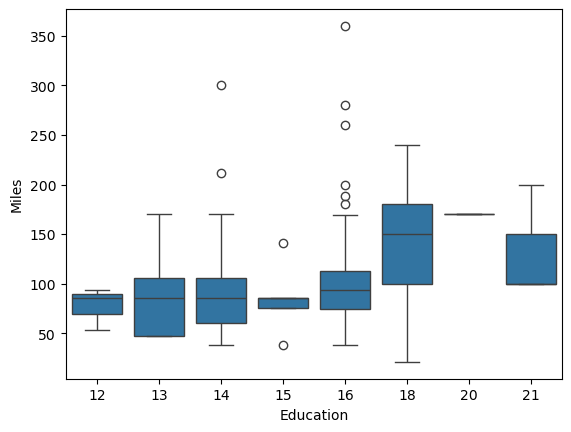

In [5]:
#bivariate analysis 
import seaborn as sns 
sns.boxplot(x='Education',y='Miles',data=df)
# does education has connection  i think indirect connection means more Edcation more income more miles

<Axes: xlabel='Education', ylabel='Income'>

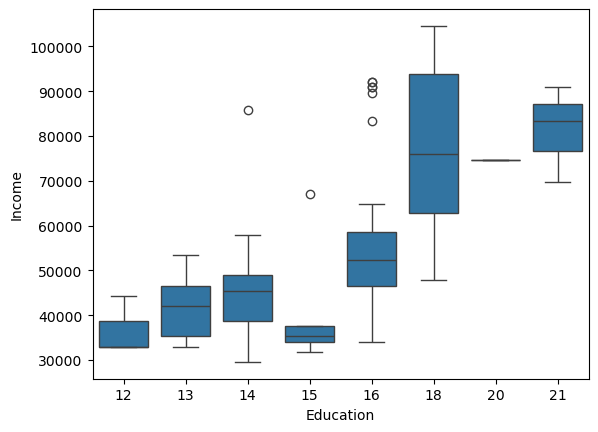

In [6]:
sns.boxplot(x='Education',y='Income',data=df)

<Axes: xlabel='Miles', ylabel='Income'>

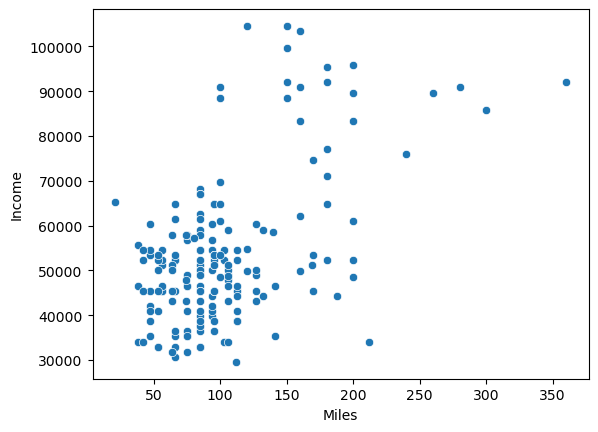

In [7]:
#to know the relationship between miles and income 
sns.scatterplot(x='Miles',y="Income",data=df)


In [8]:
# IQR is optional

In [ ]:
#removing outliers from dataset 
for i in ['Income','Miles']:
    q1 = df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1

    df=df[(df[i]>=q1-1.5*iqr)&(df[i]<= q3+1.5*iqr)]
    

sns.boxplot(x='Education',y='Income',data=df)


sns.boxplot(x='Gender',y='Miles',data=df)

sns.scatterplot(x='Miles',y="Income",data=df)

sns.boxplot(x='Education',y='Income',data=df)

# This makes us that education and miles has no relationship 
sns.boxplot(x='Education',y='Miles',data=df)
#because all medians are parallel to each other

<Axes: xlabel='Miles', ylabel='Income'>

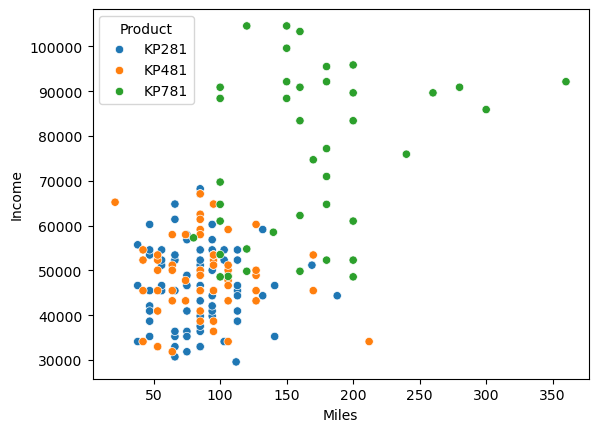

In [10]:
#why we have removed ior because we are missing the data of people who buy highend version and 
sns.scatterplot(x='Miles',y="Income",data=df,hue='Product')

In [14]:
#pie chart % contribution of each product 
data = df['Product'].unique()
print(data)

['KP281' 'KP481' 'KP781']


In [1]:
#import matplotlib.pyplot as plt
#plt.pie(data=df['Product'],labels=data)

In [19]:
#this is decoy effect in male row you can find it either he can buy low version or highend version not middele version 
# mariginal and the conditional probability test 
pd.crosstab(index=df['Gender'],columns=df['Product'])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [22]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True)


Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [21]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


In [ ]:
#P(KP281/Female) = 0.5263

In [25]:
#conditional probability 
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


In [26]:
#conditional
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize ='columns')

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.5,0.483333,0.175,0.422222
Male,0.5,0.516667,0.825,0.577778


In [35]:
df1= df.drop(['Product','Gender',"MaritalStatus"],axis=1)
df1.head()

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47


<Axes: >

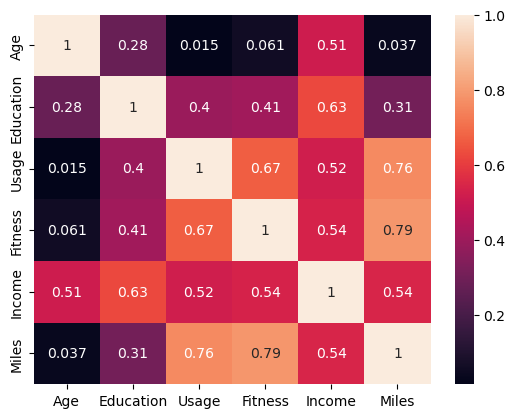

In [37]:
sns.heatmap(df1.corr(),annot=True)# coustmer profiling 